In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, median_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import utils

import math

%matplotlib inline


In [133]:
listDetailClean = pd.read_csv('../airbnb-open-data-in-nyc/listings_detail_clean.csv')

In [134]:
listDetailClean.dtypes

id                       int64
host_id                  int64
accommodates           float64
bedrooms               float64
beds                   float64
number_of_reviews      float64
host_listings_count    float64
availability_30        float64
minimum_nights         float64
bathrooms              float64
10000                    int64
10001                    int64
10002                    int64
10003                    int64
10004                    int64
10005                    int64
10006                    int64
10007                    int64
10009                    int64
10010                    int64
10011                    int64
10012                    int64
10013                    int64
10014                    int64
10016                    int64
10017                    int64
10018                    int64
10019                    int64
10021                    int64
10022                    int64
                        ...   
In-law                   int64
Loft    

In [135]:
listDetailClean.shape

(22313, 236)

### Check the attribute name in the clean data

In [136]:
listDetailClean.columns.values

array(['id', 'host_id', 'accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'host_listings_count', 'availability_30',
       'minimum_nights', 'bathrooms', '10000', '10001', '10002', '10003',
       '10004', '10005', '10006', '10007', '10009', '10010', '10011',
       '10012', '10013', '10014', '10016', '10017', '10018', '10019',
       '10021', '10022', '10023', '10024', '10025', '10026', '10027',
       '10028', '10029', '10030', '10031', '10032', '10033', '10034',
       '10035', '10036', '10037', '10038', '10039', '10040', '10044',
       '10048', '10065', '10069', '10075', '10128', '10162', '10270',
       '10279', '10280', '10282', '10301', '10302', '10303', '10304',
       '10305', '10306', '10307', '10308', '10309', '10310', '10312',
       '10314', '10451', '10452', '10453', '10454', '10455', '10456',
       '10457', '10458', '10459', '10460', '10461', '10462', '10463',
       '10464', '10465', '10466', '10467', '10468', '10469', '10470',
       '10471', '10472', '

### Only select attributes that have positive correlation with the price

In [137]:
cols = ['accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'availability_30',
       'minimum_nights', 'bathrooms', '10000', '10001', '10002', '10003',
       '10004', '10005', '10006', '10007', '10009', '10010', '10011',
       '10012', '10013', '10014', '10016', '10017', '10018', '10019',
       '10021', '10022', '10023', '10024', '10025', '10026', '10027',
       '10028', '10029', '10030', '10031', '10032', '10033', '10034',
       '10035', '10036', '10037', '10038', '10039', '10040', '10044',
       '10048', '10065', '10069', '10075', '10128', '10162', '10270',
       '10279', '10280', '10282', '10301', '10302', '10303', '10304',
       '10305', '10306', '10307', '10308', '10309', '10310', '10312',
       '10314', '10451', '10452', '10453', '10454', '10455', '10456',
       '10457', '10458', '10459', '10460', '10461', '10462', '10463',
       '10464', '10465', '10466', '10467', '10468', '10469', '10470',
       '10471', '10472', '10473', '10474', '10475', '11001', '11004',
       '11101', '11102', '11103', '11104', '11105', '11106', '11109',
       '11201', '11203', '11204', '11205', '11206', '11207', '11209',
       '11210', '11211', '11212', '11213', '11214', '11215', '11216',
       '11217', '11218', '11219', '11220', '11221', '11222', '11223',
       '11224', '11225', '11226', '11228', '11229', '11230', '11231',
       '11232', '11233', '11234', '11235', '11236', '11237', '11238',
       '11249', '11354', '11355', '11356', '11357', '11358', '11360',
       '11361', '11362', '11364', '11365', '11366', '11367', '11368',
       '11370', '11372', '11373', '11374', '11375', '11377', '11378',
       '11379', '11385', '11411', '11412', '11413', '11414', '11415',
       '11416', '11417', '11418', '11419', '11420', '11421', '11422',
       '11423', '11426', '11427', '11428', '11429', '11432', '11433',
       '11434', '11435', '11436', '11691', '11692', '11693', '11694',
       '91766', 'Apartment', 'Bed & Breakfast', 'Boat', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Castle', 'Cave', 'Chalet', 'Condominium',
       'Dorm', 'Earth House', 'Guest suite', 'Guesthouse', 'Hostel',
       'House', 'In-law', 'Loft', 'Other', 'Serviced apartment',
       'Timeshare', 'Townhouse', 'Train', 'Treehouse', 'Vacation home',
       'Villa', 'Entire home/apt', 'Private room', 'Shared room', 'Airbed',
       'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', '20-29', '30-39',
       '40-49', '50-59', '60-69', '70-79', '80-84', '85-89', '90-94',
       '95-100', 'price']

data = listDetailClean[cols]



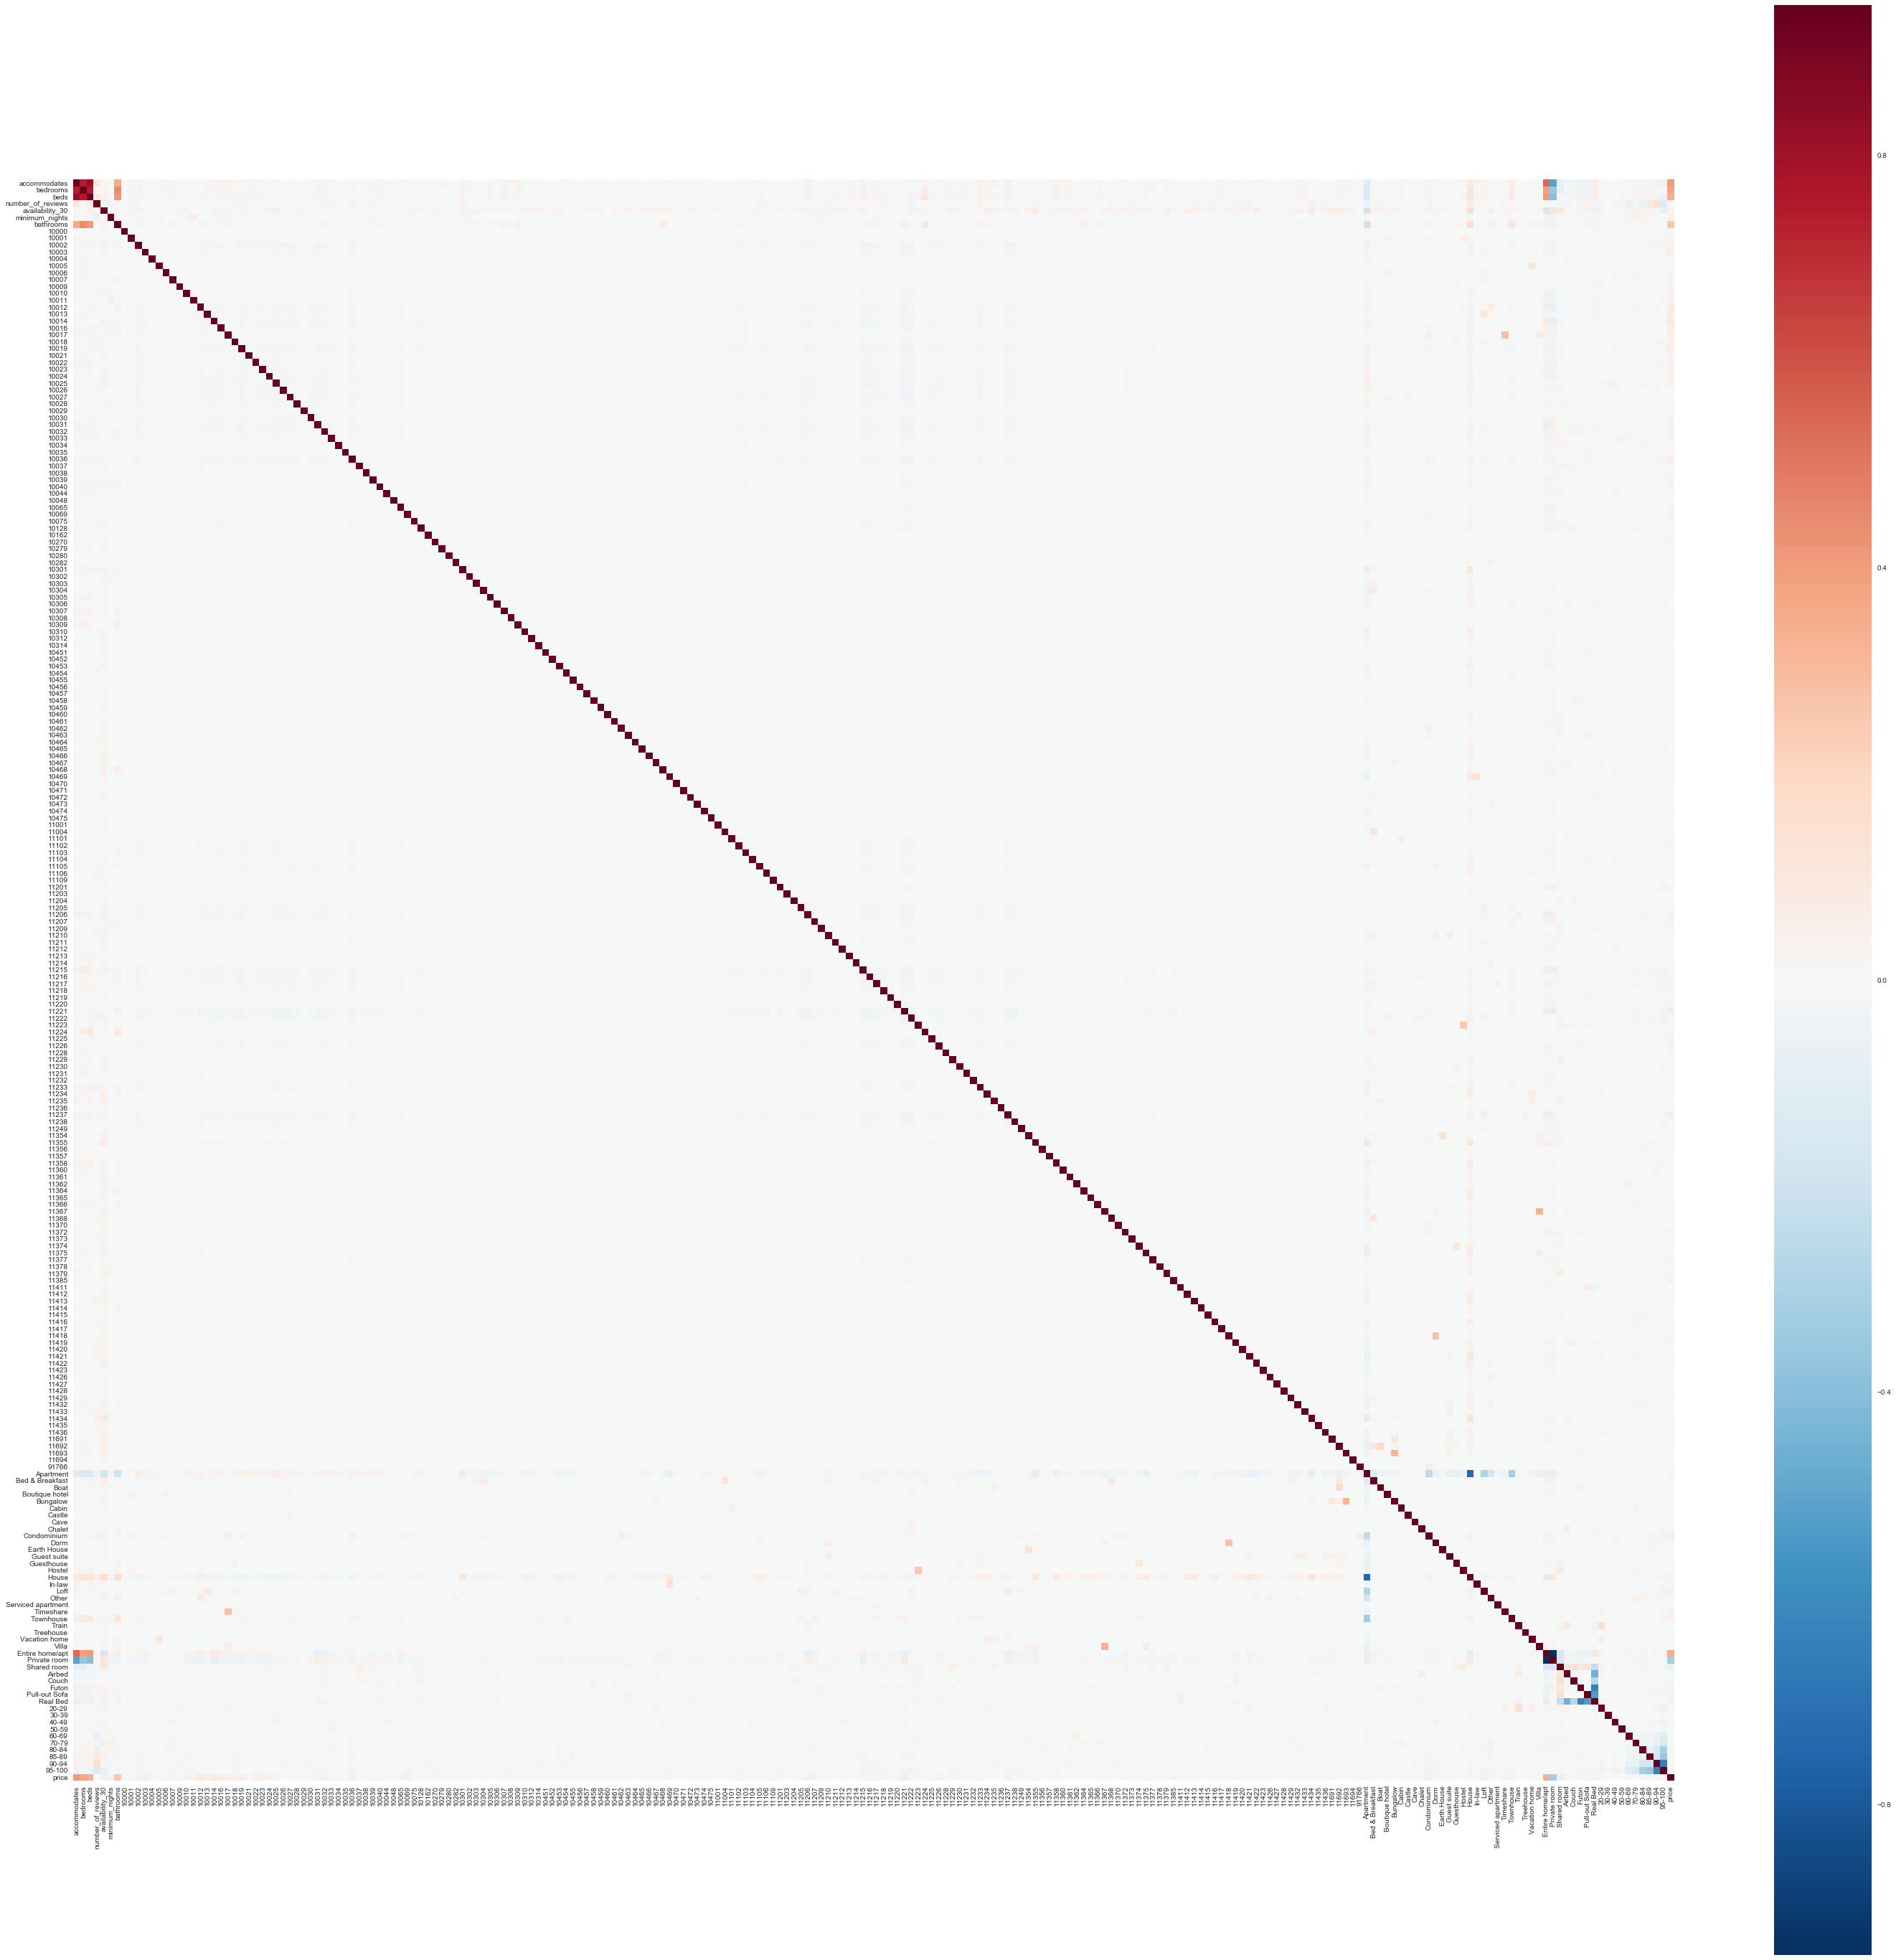

In [138]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat, vmax=.8, square=True);

In [139]:
corr_val=0.01
df2 = data.corr().unstack().reset_index()
df2 = df2[df2[0]>corr_val]

In [140]:
df3 = df2[df2['level_0'] == 'price']

In [141]:
df3 = df3[df3[0] > 0]

In [142]:
corrcolsSeries = df3.level_1
corrcolsArr = corrcolsSeries.tolist()
corrcolsArr.remove('price')


In [143]:
len(corrcolsArr)

47

We only use **47** attributes to train our model

#### Note:

Not all zipcodes(neighborhood) correlate to the price, because some neighboorhood location are secluded from the others, so we can assume that these are outliers

In [144]:
corrcolsArr

['accommodates',
 'bedrooms',
 'beds',
 'availability_30',
 'minimum_nights',
 'bathrooms',
 '10001',
 '10002',
 '10003',
 '10006',
 '10007',
 '10009',
 '10010',
 '10011',
 '10012',
 '10013',
 '10014',
 '10016',
 '10017',
 '10018',
 '10019',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10028',
 '10036',
 '10038',
 '10065',
 '10069',
 '10128',
 '10270',
 '10279',
 '10282',
 '11201',
 '11217',
 '11224',
 '11249',
 'Condominium',
 'Loft',
 'Timeshare',
 'Townhouse',
 'Entire home/apt',
 'Real Bed',
 '60-69',
 '95-100']

### Split to training data and test data with actual listing price

In [238]:
X_train, X_test, y_train, y_test = train_test_split(listDetailClean[corrcolsArr], listDetailClean['price'], test_size=0.2, random_state=42)


### Finding the nearest neighbours

In [205]:
# Odd list of K for KNN
numList = list(range(1,60))

# filter the odd ones
neighbors = filter(lambda x: x%2 != 0, numList)

# save the MAE values
mae = []
medae = []
# Finding the nearest neighbors
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    prediction_mae = mean_absolute_error(y_test, predictions)
    prediction_medae = median_absolute_error(y_test, predictions)
    mae.append(prediction_mae)
    medae.append(prediction_medae)

The nearest k neighbors is 15


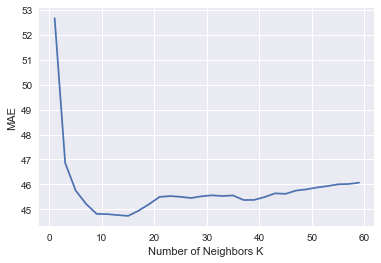

In [206]:
# Finding the nearest k neighbors
optimalk = neighbors[mae.index(min(mae))]
print "The nearest k neighbors is %d" % optimalk

plt.plot(neighbors, mae)
plt.xlabel('Number of Neighbors K ')
plt.ylabel('MAE')
plt.show()

The nearest k neighbors is 17


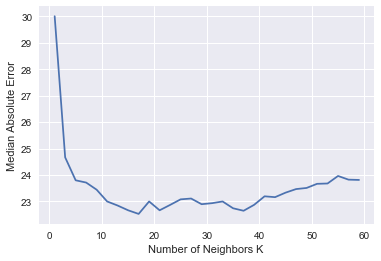

In [207]:
# Finding the nearest k neighbors
optimalk = neighbors[medae.index(min(medae))]
print "The nearest k neighbors is %d" % optimalk

plt.plot(neighbors, medae)
plt.xlabel('Number of Neighbors K ')
plt.ylabel('Median Absolute Error')
plt.show()

### Build KNN model using the nearest neighbour 

In [247]:
knn = KNeighborsRegressor(n_neighbors=15)


knn.fit(X_train, y_train)
predictions = knn.predict(X_test)



### Write predictions to csv

In [248]:
def WriteToCsv(predictions, X_text, y_test, filename):
    # convert predictions array to dataframe type
    pred_df=pd.DataFrame(predictions, columns=['price_prediction'])
    
    ### Concat price predictions to the test data set
    result = pd.concat([X_test , y_test], axis=1, ignore_index=False)
    result['predictions'] = pd.Series(predictions, index=result.index)
    
    ### Merge result dataframe result to the original dataset, in order to know the listing id
    df_out = pd.merge(listDetailClean,result[['predictions']],how = 'left',left_index = True, right_index = True)
    df_final = df_out[df_out['predictions'].notnull()]
    
    ### Write output to a csv file
    df_final.to_csv(filename, sep=',')
#     return df_final

filename = 'knn_test_data_predictions_01.csv'
WriteToCsv(predictions, X_test, y_test, filename)


### Mean Absolute Error

In [249]:
predictions_mae_final = mean_absolute_error(y_test, predictions)
predictions_mae_final

44.737889312121887

In [250]:
knn = KNeighborsRegressor(n_neighbors=17)


knn.fit(X_train, y_train)
predictions = knn.predict(X_test)



### Write predictions to csv

In [253]:
filename = 'knn_test_data_predictions_02.csv'
WriteToCsv(predictions, X_test, y_test, filename)

### Median Absolute Error

In [246]:
predictions_medae_final = median_absolute_error(y_test, predictions)
predictions_medae_final

22.529411764705884

### Result

Using Actual listing price, KNN produces:
 - Mean Absolute Error of **44.737889312121887**
 - Median Absolute Error of **22.529411764705884**


---








### Split to training data and test data with log tranformation listing price

In [254]:
X_train, X_test, y_train, y_test = train_test_split(listDetailClean[corrcolsArr], listDetailClean['price_log'], test_size=0.2, random_state=42)

In [213]:
# Odd list of K for KNN
numList = list(range(1,60))

# filter the odd ones
neighbors = filter(lambda x: x%2 != 0, numList)

# save the MAE values
mae_log = []
medae_log = []
# Finding the nearest neighbors
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    prediction_mae = mean_absolute_error(y_test, predictions)
    prediction_medae = median_absolute_error(y_test, predictions)
    mae_log.append(prediction_mae)
    medae_log.append(prediction_medae)

The nearest k neighbors is 7


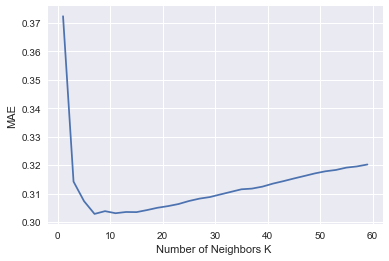

In [216]:
# Finding the nearest k neighbors
optimalk = neighbors[mae_log.index(min(mae_log))]
print "The nearest k neighbors is %d" % optimalk

plt.plot(neighbors, mae_log)
plt.xlabel('Number of Neighbors K ')
plt.ylabel('MAE')
plt.show()

The nearest k neighbors is 15


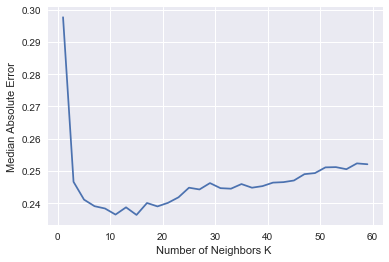

In [217]:
# Finding the nearest k neighbors
optimalk = neighbors[medae_log.index(min(medae_log))]
print "The nearest k neighbors is %d" % optimalk

plt.plot(neighbors, medae_log)
plt.xlabel('Number of Neighbors K ')
plt.ylabel('Median Absolute Error')
plt.show()

In [260]:
knn = KNeighborsRegressor(n_neighbors=7)


knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


### Write predictions to csv

In [261]:
filename = 'knn_test_data_predictions_03.csv'
WriteToCsv(np.exp(predictions), X_test, np.exp(y_test), filename)

### Mean Absolute Error

In [262]:
predictions_mae_log = mean_absolute_error(np.exp(y_test), np.exp(predictions))
predictions_mae_log

44.298393654093871

In [263]:
knn = KNeighborsRegressor(n_neighbors=15)


knn.fit(X_train, y_train)
predictions = knn.predict(X_test)


### Write predictions to csv


In [264]:
filename = 'knn_test_data_predictions_04.csv'
WriteToCsv(np.exp(predictions), X_test, np.exp(y_test), filename)

### Median Absolute Error

In [265]:
predictions_medae_log = median_absolute_error(np.exp(y_test), np.exp(predictions))
predictions_medae_log

21.993008304687933

### Result

Using Log transformed listing price, KNN produces:
 - Mean Absolute Error of **44.298393654093871**
 - Median Absolute Error of **21.993008304687933**


---

## Logistic Regression

Here, we will try to use Logistic Regression to predict listing price

Using the same attributes as in KNN model

### Split to training data and test data with actual listing price

In [266]:
X_train, X_test, y_train, y_test = train_test_split(listDetailClean[corrcolsArr], listDetailClean['price'], test_size=0.2, random_state=42)

### Build Logistic Regression model

In [267]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [268]:
lr_predictions = lr.predict(X_test)
lr_predictions

array([ 250.,  150.,   55., ...,  150.,  150.,   75.])

### Write predictions to csv


In [272]:
filename = 'lr_test_data_predictions_01.csv'
WriteToCsv(predictions, X_test, y_test, filename)

### Mean Absolute Error

In [270]:
predictions_lrmae = mean_absolute_error(y_test, lr_predictions)
predictions_lrmae

48.925610575845845

### Median Absolute Error

In [271]:
predictions_lrmedae = median_absolute_error(y_test, lr_predictions)
predictions_lrmedae

25.0

### Result

Logistic Regression produces:
 - Mean Absolute Error of **48.925610575845845**
 - Median Absolute Error of **25.0**



### Split to training data and test data with log tranformation listing price

In [273]:

y = listDetailClean['price_log'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(listDetailClean[corrcolsArr], y, test_size=0.2, random_state=42)

In [274]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
# check type
print(utils.multiclass.type_of_target(listDetailClean['price_log'].astype('int')))

multiclass


In [278]:
lr_predictions = lr.predict(X_test)
lr_predictions

array([5, 5, 4, ..., 4, 4, 4])

### Write predictions to csv


In [280]:
filename = 'lr_test_data_predictions_02.csv'
WriteToCsv(np.exp(predictions), X_test, np.exp(y_test), filename)

### Mean Absolute Error

In [281]:
predictions_lrmae_log = mean_absolute_error(np.exp(y_test), np.exp(lr_predictions))
predictions_lrmae_log

25.339561837689121

### Median Absolute Error


In [282]:
predictions_lrmedae_log = median_absolute_error(np.exp(y_test), np.exp(lr_predictions))
predictions_lrmedae_log

0.0

---

## Comparison

### Mean Absolute Error

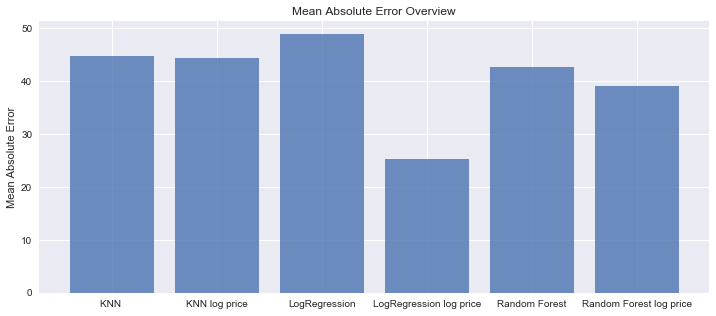

In [234]:
objects = ('KNN ', 'KNN log price', 'LogRegression', 'LogRegression log price', 'Random Forest', 'Random Forest log price')
y_pos = np.arange(len(objects))
# These values are taken from the python notebook implementation of Random Forest algorithm (Random Forest.ipynb)
predictions_rf_mae = 42.70
predictions_rf_mae_log = 39.05
performance = [predictions_mae_final, predictions_mae_log, predictions_lrmae, predictions_lrmae_log, predictions_rf_mae, predictions_rf_mae_log]
 
plt.figure(figsize=(12,5))

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Overview')
 
plt.show()

### Median Absolute Error


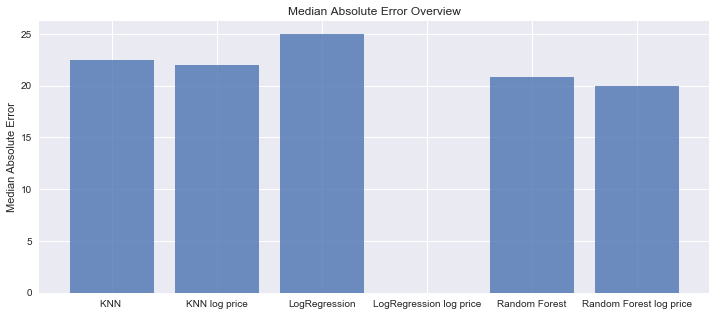

In [237]:
objects = ('KNN ', 'KNN log price', 'LogRegression', 'LogRegression log price', 'Random Forest', 'Random Forest log price')
y_pos = np.arange(len(objects))

# These values are taken from the python notebook implementation of Random Forest algorithm (Random Forest.ipynb)
predictions_rf_medae = 20.83
predictions_rf_medae_log = 19.95
performance = [predictions_medae_final, predictions_medae_log, predictions_lrmedae, predictions_lrmedae_log, predictions_rf_medae, predictions_rf_medae_log]
 
plt.figure(figsize=(12,5))

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Median Absolute Error')
plt.title('Median Absolute Error Overview')
 
plt.show()